<h1> Case de Análise de Dados: Supermercado Estrela Verde </h1> 

![Imagem do Supermercado](assets/Estrela_verde.png)

<h2> 1. Visão Geral </h2> 

<h3>1.1. Case</h3><br>
O "Supermercado Estrela Verde" enfrenta uma crise institucional caracterizada por desafios operacionais significativos, queda nas vendas e a necessidade urgente de restaurar a confiança dos clientes. Em meio a essas dificuldades, a empresa busca estratégias baseadas em dados para superar a crise e fortalecer sua posição no mercado.Dessa forma, o supermercado decidiu investir em uma equipe de Analistas de Dados, para que possam a extrair os principais insights do relatório de vendas, de modo a direcionar as políticas institucionais. 

<h3>1.2. Objetivos</h3>

- Extrair insights do relatório de vendas da empresa, de modo a direcionar a tomada de decisão por parte do setor administrativo da empresa; 
<br> 
- Sugerir medidas administrativas baseado nos insights obtidos através dos dados. 

<h3>1.3 Tarefas</h3>


1. **Análise de Desempenho das Filiais:** Compare o desempenho das filiais em termos de receita, vendas e lucro; analise a popularidade de linhas de produtos por filial.


2. **Comportamento do Cliente:** Examine as diferenças de compra entre membros e não membros, impacto do gênero nas decisões de compra, e preferências de métodos de pagamento.

3. **Análise de Tendências de Vendas:** Avalie as tendências de vendas ao longo do tempo e identifique padrões de sazonalidade.

4. **Análise de Produtos e Categorias:** Determine as categorias mais lucrativas e a relação entre classificações dos clientes e vendas.

5. **Análise de Sustentabilidade:** Avalie a popularidade de produtos ecológicos e identifique tendências de compra de produtos sustentáveis.

6. **Engajamento do Cliente e Feedback:** Investigue a relação entre classificação dos clientes e características das compras.

7. **Análise de Eficiência Operacional:** Examine a relação entre horário do dia e volume de vendas; analise o desempenho do estoque.

8. **Impacto Comunitário e Localização:** Compare o desempenho das filiais com base na localização e características comunitárias.

9. **Estratégias de Marketing e Promoções:** Identifique oportunidades para campanhas de marketing direcionadas e promoções especiais.

<h3>1.4. Sumário da Base de Dados </h3>

- **Invoice ID**: Identificação única de cada transação realizada no supermercado.
- **Branch**: Representa a filial do supermercado onde a transação ocorreu.
- **City**: Cidade onde a filial do supermercado está localizada.
- **Customer type**: Indica se o cliente é um membro ("Member") ou um cliente comum ("Normal").
- **Gender**: Gênero do cliente.
- **Product line**: Categoria do produto comprado.
- **Unit price**: Preço unitário do produto.
- **Quantity**: Quantidade de produtos comprados na transação.
- **Tax 5%**: Valor do imposto aplicado à venda, que é 5% do total da compra.
- **Total**: Valor total da transação, incluindo impostos.
- **Date**: Data da transação.
- **Time**: Hora da transação.
- **Payment**: Método de pagamento utilizado (ex: dinheiro, cartão de crédito, carteira eletrônica).
- **cogs (Cost of Goods Sold)**: Custo dos produtos vendidos.
- **Gross margin percentage**: Percentual de margem bruta nas vendas.
- **Gross income**: Renda bruta obtida na venda.
- **Rating**: Avaliação dada pelo cliente à compra.

<h3>1.5. Entrega</h3> 

A partir das Observações obtidas, deve ser entregue um relatório, de modo a sintetizar os principais tópicos explorados na Análise de dados da Empresa.

<h2> 2. Overview da Base de Dados </h2> 

<h4>2.1. Importando as bibliotecas necessárias </h3> 

In [278]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 
import warnings

# Ignorar todos os avisos
warnings.filterwarnings('ignore')

<h4> 2.2 Leitura da Base de Dados </h4> 

In [279]:
df_sales = pd.read_csv('supermarket_sales.csv')

In [280]:
df_sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [281]:
df_sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [282]:
dimensoes = df_sales.shape
print('O número de linhas:  {0}'.format(dimensoes[0]))
print('O número de colunas: {0}'.format(dimensoes[1]))

O número de linhas:  1000
O número de colunas: 17


In [283]:
df_sales.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [284]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

<h2> 3. Pré-Análise de Dados </h2> 

Antes de Iniciar o Projeto, quero buscar tornar a base de dados mais completa, para extrairmos insights. Assim, buscarei, aqui, preparar o Dataset e o código, de modo a facilitar a EDA. 

<h4>3.1 Funções</h4> 

Aqui, estarão funções que serão utilizadas no desenvolvimento do código.

In [285]:
def converte_object(series):
    tipo = df_sales[series].dtypes
    if tipo == 'O':  
        return df_sales[series].astype('category')
    else: 
        return df_sales[series]

def converte_tempo(time):
    hora = int(time[:2])
    if hora <= 12:
        return 'morning'
    elif hora <= 17:
        return 'afternoon'
    else: 
        return 'night'
def cria_series(series_entrada):
    return df_sales[series_entrada].apply(converte_tempo)


def converte_mes(date): 
    lista_meses = ['janeiro' , 'fevereiro' , 'março' , 'abril' , 'maio' , 'junho' , 'julho' , 'agosto' , 'setembro' , 'outubro' , 'novembro' , 'dezembro']
    mes = int(date[:1])
    return lista_meses[mes - 1]

def cria_mes(series):
    return df_sales[series].apply(converte_mes)


def cria_satisfacao(rating): 
    if rating >= 9:
        return 'Muito Satisfeito'
    elif rating >= 7:
        return 'Satisfeito'
    else: 
        return 'Insatisfeito'
def coluna_satisfacao(series):
    return  df_sales[series].apply(cria_satisfacao)

def filtra_cidade(cidade):
    # Create a boolean mask where True corresponds to rows where City equals 'cidade'
    filtro_cidade = df_sales['City'] == cidade
    # Use the mask to filter rows
    return df_sales[filtro_cidade]

**3.2. Funções de Visualização Gráfica** 

In [286]:
def create_barplot(value_counts , titulo_desejado , eixo_x , eixo_y , colors):
    
    plt.title(titulo_desejado)
    bars =  plt.bar(value_counts.keys() , value_counts.values() , color=colors)
    plt.xlabel(eixo_x)
    plt.ylabel(eixo_y)
    #plt.legend()
    
    for bar in bars: 
    
        val_count = bar.get_height()
        width_bar = bar.get_width() 
        x_bar = bar.get_x()
        plt.text((x_bar + width_bar/2) , val_count  ,  f'{val_count:.2f}' ,fontweight = 'bold',  ha='center', va='bottom' , alpha = 0.8)
        
def create_hist(df , x_series , titulo , legenda_x , legenda_y , hue_series , n_bins , cor):
    
    if hue_series != False:
        sns.histplot(data=df, x=x_series, hue=hue_series, multiple='stack' , bins = n_bins , color = cor , kde = True)
    else:
        sns.histplot(data=df, x=x_series, multiple='stack' , bins = n_bins , color = cor , kde = True)
    
    plt.title(titulo)
    plt.xlabel(legenda_x)
    plt.ylabel(legenda_y)
    
def create_boxplot(df , series_x , series_y , legenda_x , legenda_y , titulo):
    sns.boxplot(x=series_x, y=series_y, data=df )
    plt.title(titulo)
    plt.xlabel(legenda_x)
    plt.ylabel(legenda_y)

<h4> 3.2. Tratamento das Colunas </h4> 
 


As variáveis qualitativas, e as variáveis de séries temporais estão representadas como `Object`, e serão transformadas em `Category` e `Datatime`.

In [287]:
df_sales = df_sales.drop('Invoice ID' , axis = 1) #Removendo a Colunas ID, por só representar uma forma de identificação b

In [288]:
df_sales['Date'] = df_sales['Date'].astype('string') #Transformando essa Series em uma Série Temporal 
df_sales.Time = df_sales.Time.astype('string') #Trasnformando o Horário em String 


In [289]:
lista_colunas = df_sales.columns
for coluna in lista_colunas:
    df_sales[coluna] = converte_object(coluna)
# Nesse bloco, converti as variáveis listadas como Object, em Categóricas. 

In [290]:
df_sales.dtypes

Branch                     category
City                       category
Customer type              category
Gender                     category
Product line               category
Unit price                  float64
Quantity                      int64
Tax 5%                      float64
Total                       float64
Date                         string
Time                         string
Payment                    category
cogs                        float64
gross margin percentage     float64
gross income                float64
Rating                      float64
dtype: object

<h4>3.3 Feature Engineering</h4>

Nesse momento, buscarei criar novas colunas, através das colunas já existentes da Base de dados, de modo a aumentar o número de possibilidades de análise.

**1. Variável Sifht** 

Essa variável indicará o período do dia ao qual foi feita a compra, o que pode ser um insight para indicar os períodos de maiores fluxos diários.  

In [291]:
df_sales['Shift'] = cria_series('Time')

**2. Variável Month**

Indicará o mês da compra, de modo a indicar uma análise de sazonalidade, sendo possível gerar insights de mês com maiores e menores fluxos de clientes, para criar possíveis estratégias operacionais.


In [292]:
df_sales['month'] = cria_mes('Date')

**3. Variável Satisfaction**

Essa variável será utilizada para mensurar a escala de experiência do cliente, baseado no Rating, de modo à facilitar a compreensão dessa variável. 

In [293]:
df_sales['Satisfaction'] = coluna_satisfacao('Rating')

Agora, vou preparar o DataFrame para iniciarmos a Análise dos Dados. 

In [294]:
colunas = df_sales.columns
lista_colunas = df_sales.columns
for coluna in lista_colunas:
    df_sales[coluna] = converte_object(coluna)

In [295]:
df_sales.dtypes

Branch                     category
City                       category
Customer type              category
Gender                     category
Product line               category
Unit price                  float64
Quantity                      int64
Tax 5%                      float64
Total                       float64
Date                         string
Time                         string
Payment                    category
cogs                        float64
gross margin percentage     float64
gross income                float64
Rating                      float64
Shift                      category
month                      category
Satisfaction               category
dtype: object

In [296]:
df_sales.head(5)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Shift,month,Satisfaction
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,afternoon,janeiro,Muito Satisfeito
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,morning,março,Muito Satisfeito
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,afternoon,março,Satisfeito
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,night,janeiro,Satisfeito
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,morning,fevereiro,Insatisfeito


<h2> 4. Análise dos Dados da Empresa </h2> 

<h3> Parte 1: Visão Geral da Empresa </h3> 

Antes de iniciar qualquer análise profunda acerca da empresa, eu acredito que é relevante estabelecermos uma visão panorâmica das vendas do supermercado.

**Análise da Distribuição das  Variáveis quantitativas** 

In [297]:
df_sales.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,2.649463e+01,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431e+00,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,2.458853e+02,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,2.341765e+02,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,6.131498e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580e+00,4.000000,5.500000,7.000000,8.500000,10.000000


**Impressões Relevantes do `Describe`**: 

- `Unit Price`: A média dos preços de produtos vendidos é de `56.67` dólares, com um desvio padrão de `26.49`, e isso representa uma variação siginificativa dos preços, vendidos. Porém, o fato de termos mais de 75% dos produtos (750 produtos) acima de 32 reais,mostra a preferência das pessoas por produtos de preço significativamente elevado. 

- `Quantity`: Mais de 50% dos clientes (500 pessoas) , compraram mais de 5 unidades  do produto comprado, e mais de 75% compraram mais que 3.

- `Total`: A média de preço gasto em 1 produto é de `322` dólares, com desvio padrão de `246`, e com mediana de `253`, o que mostra que há uma assimetria à direita, de valores acima da média. Por outro lado,  mais de 75% dos produtos estão acima de 124 reais, e isso ilustra que, no geral, o preço das compras é elevado. 

- `Gross income`: A média do lucro por produto é de `15.37` dólares, com alta variância, o que mostra oscilações nesse lucro, e isso pode indicar a influencia de outros fatores nisso. 

- `Rating`: A média de Rating é de `6.97` , com variância de de `1.71` , indicando uma maior concetração de ratings 'medianos'. 



**Análise de Correlação entre as Variáveis quantitativas**

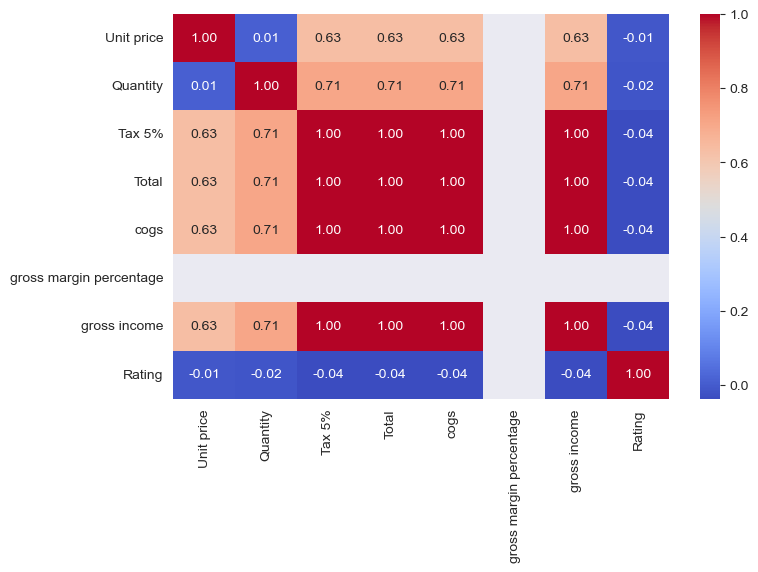

In [298]:
plt.figure(figsize=(8,5))
sns.heatmap(df_sales.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

**`Observações`**: 

-  O `Rating` não apresenta grande correlação com as variáveis quantitativas mencionadas; <br> 

-  As variáveis indicadores de `taxas`, apresentam grande correlação com os indicadores de preço, e quantidade; <br>

-  A `Renda Bruta` obtida com as vendas, apresenta grande correlação com os preços e a quantidade de produtos comprados. <br> 

In [299]:
df_yangon = filtra_cidade('Yangon')
df_napytaw = filtra_cidade('Naypyitaw')
df_manda = filtra_cidade('Mandalay')

**Pergunta 1: Quais filiais apresentam maior número de vendas?** 

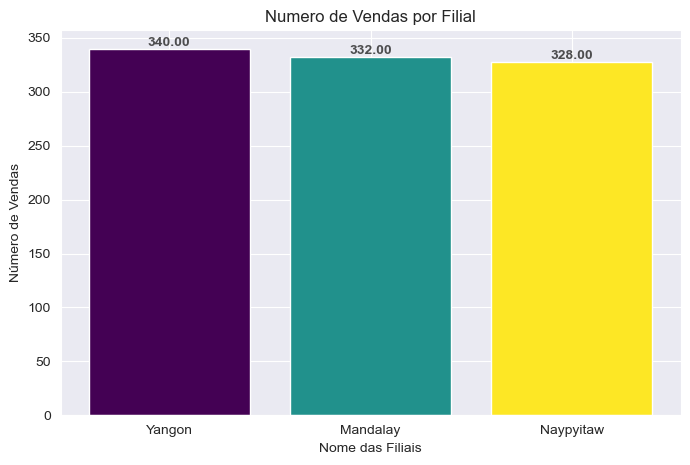

In [300]:
count_itens  = df_sales.City.value_counts()
count_itens = dict(count_itens)

sns.set_style('darkgrid')
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, 3))

plt.figure(figsize=(8 , 5))

create_barplot(count_itens , 'Numero de Vendas por Filial' , 'Nome das Filiais' , 'Número de Vendas' , colors)

**`Observação`**: O número de vendas por filiais nesse período de tempo em questão é similar, de modo geral.  

**Pergunta 2: Qual filial apresenta maior nível de Satisfação dos Clientes?**

**1. Média de Avaliação por Filial**

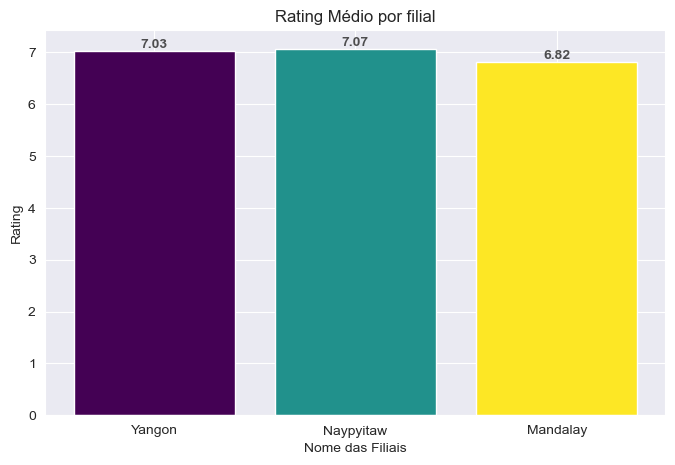

In [301]:
lista_dfs = [df_yangon , df_napytaw , df_manda]
count_dict1 = {'Yangon' : 0 , 'Naypyitaw': 0 , 'Mandalay': 0}

for i in range(len(lista_dfs)):
    
    mean = lista_dfs[i].Rating.mean()
    cidade = list(lista_dfs[i].City)[0]
    count_dict1[cidade] = mean
    
plt.figure(figsize=(8 , 5))
create_barplot(count_dict1 , 'Rating Médio por filial' , 'Nome das Filiais' , 'Rating' , colors)

**2.Distribuição do Rating por Filial** 

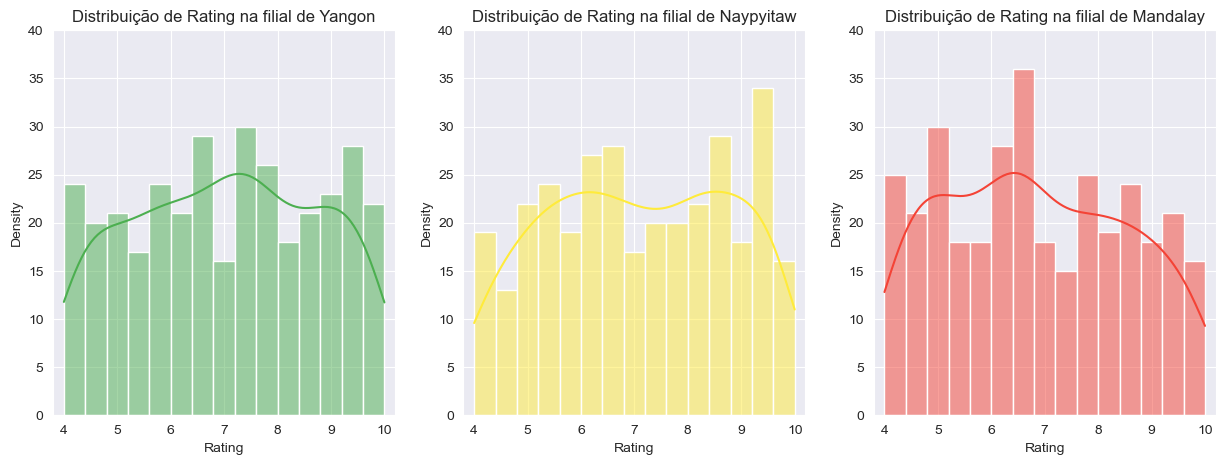

In [302]:
nome_cidade = ['Yangon' , 'Naypyitaw' , 'Mandalay']
cores = ["#4CAF50" , "#FFEB3B" , "#F44336"]

plt.figure(figsize=(15 , 5))
for i in range(1 , 4):
    plt.subplot(1 , 3 , i)
    create_hist(lista_dfs[i-1] , 'Rating' , f'Distribuição de Rating na filial de {nome_cidade[i-1]}' , 'Rating' , 'Density', False , 15 , cores[i-1])
    plt.xlim(3.8 , 10.2)
    plt.ylim(0 , 40)

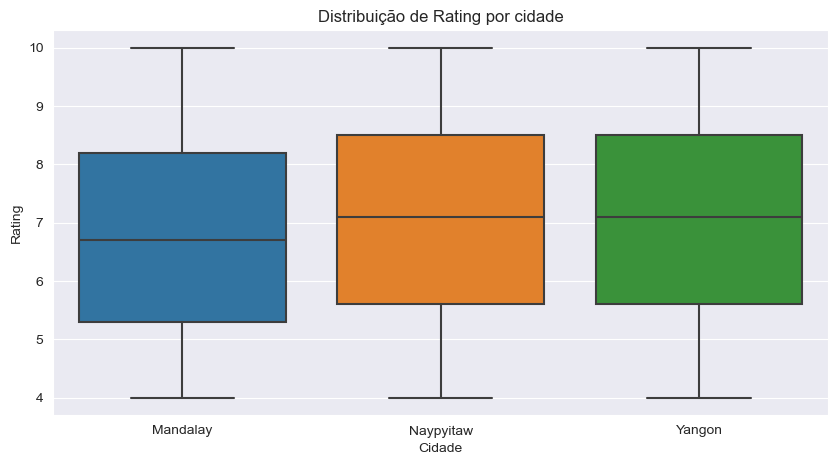

In [303]:
plt.figure(figsize=(10 , 5))
create_boxplot(df_sales , 'City' , 'Rating' , 'Cidade' , 'Rating' , 'Distribuição de Rating por cidade')

**3. Nível de Satisfação por filial**

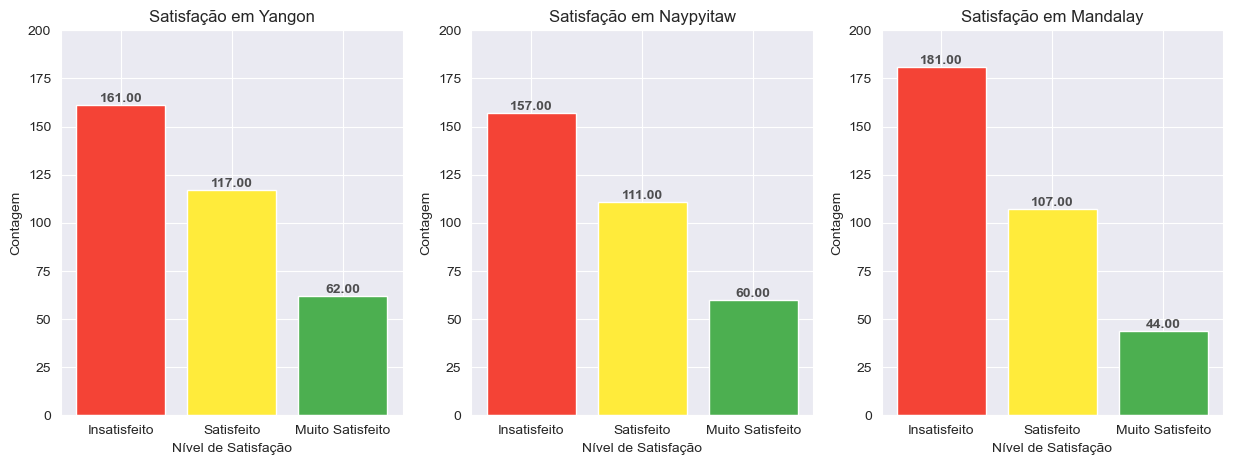

In [304]:
colors = ['#F44336', '#FFEB3B', '#4CAF50']
lista_nomes = ['Yangon', 'Naypyitaw', 'Mandalay']
i = 1
plt.figure(figsize= (15 ,5 ))
for df_cidade in lista_dfs:
    count_dict = dict(df_cidade.Satisfaction.value_counts())
    city_name = lista_nomes[i-1]
    plt.subplot( 1 , 3 , i)
    
    create_barplot(count_dict , f"Satisfação em {city_name}" , 'Nível de Satisfação' , 'Contagem' , colors)
    plt.ylim(0 , 200)
    i += 1 
    

**`Observações`**: 

1 - `Distribuição do Rating`: As filiais das cidades de Yangon e Naypyitaw são as que apresentam a as maiores médias, e maior concentração de valores próximos da mediana em relação à cidade de Mandalay, que apresentam o maior número de avaliações negativas, e uma distribuição mais distante da média. Observando o histograma dessa cidade, podemos ver que há grande concentração de avaliações abaixo da média (6.8)  , o que mostra que há uma leve assimetria à direita no seu histograma de avaliações. 

2 - `Número de clientes satisfeito`: Para validar essas possibilidade, temos, também, que  Yangon e Naypyitaw são as 2 que apresentam maior quantidade de satisfeitos e muito satisfeitos, o que mostra um desempenho mais consistente em relação à Mandalay, que apresentam mais clientes Insatisfeitos do que os demais. 
    Além disso, nota-se, de modo geral, uma maior quantidade de clientes insatisfeitos do que Satisfeitos nessas filiais, o que pode ser um mal indicador.

**Pergunta 3: Qual filial mais gerou lucro para a Empresa?** 

In [305]:
# total - cogs
i = 0
lucro = 0 
lucro_cidade = {'Yangon' : 0 , 'Naypyitaw': 0 , 'Mandalay': 0}
for df in lista_dfs:
    lucro = 0 
    city_name = lista_nomes[i]
    df['Lucro'] = df['Total'] - df['cogs']
    for lucrin in list(df['Lucro']):
        lucro += lucrin 
    lucro_cidade[city_name] = lucro
    i += 1 

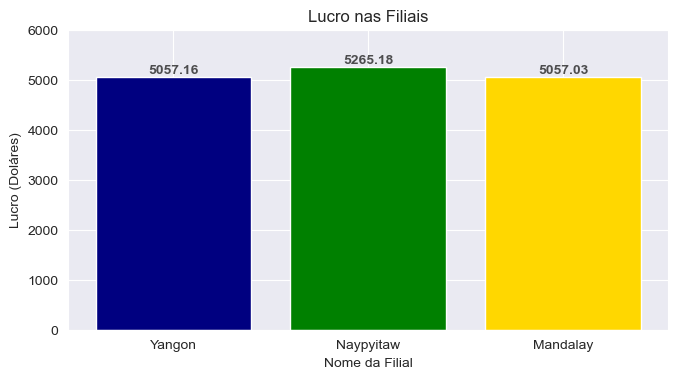

In [306]:
fig = plt.figure(figsize=(15 , 5))
colors = ["navy", "green", "gold"]


create_barplot(lucro_cidade , f"Lucro nas Filiais" , 'Nome da Filial' , 'Lucro (Doláres)' , colors = colors)
plt.ylim(0 , 6000)
fig.subplots_adjust(left=0.2, right=0.6, top=0.9, bottom=0.3)


**`Observação`**: Aqui, percebe-se que a filial com satisfação entre as 3, foi, também, a que mais gerou lucro para a rede. Apesar disso, as 3 apresentam um desempenho similar em relação à lucro gerado. 

**Pergunta 4: Qual das 3 filiais apresenta maior percentual de membros?**

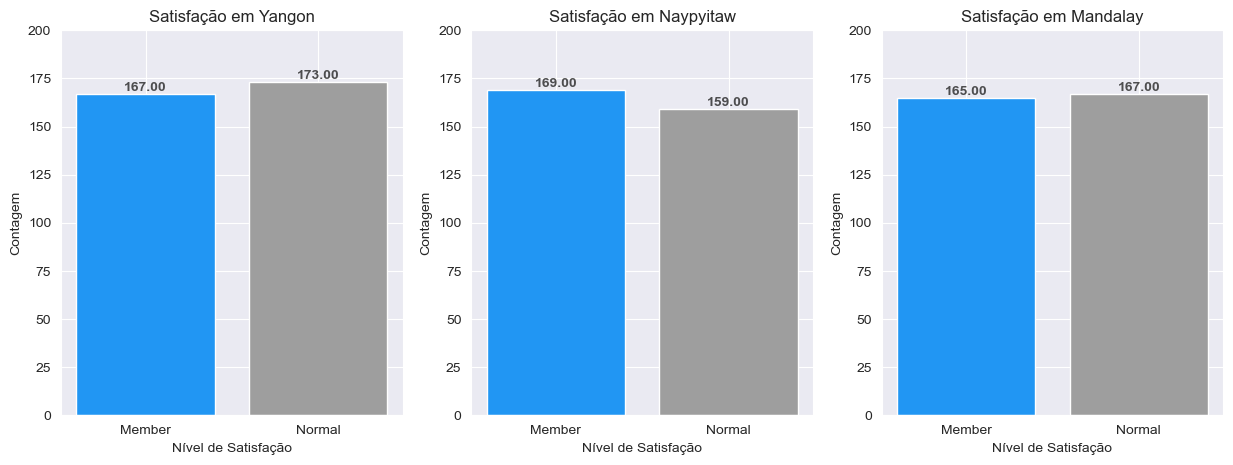

In [310]:
colors = ['#2196F3', '#9E9E9E', '#4CAF50']
lista_nomes = ['Yangon', 'Naypyitaw', 'Mandalay']
i = 1
plt.figure(figsize= (15 ,5 ))
for df_cidade in lista_dfs:
    count_dict = dict(df_cidade['Customer type'].value_counts(sort=False))
    city_name = lista_nomes[i-1]
    plt.subplot( 1 , 3 , i)
    
    create_barplot(count_dict , f"Satisfação em {city_name}" , 'Nível de Satisfação' , 'Contagem' , colors)
    plt.ylim(0 , 200)
    i += 1 

**`Observação`**: Naypitaw é a que apresenta a maior quantidade de membros, seguida de Yangon e, depois, Mandalay.



**Pergunta 5: Quais os produtos mais vendidos de modo geral, e por Filial?** 

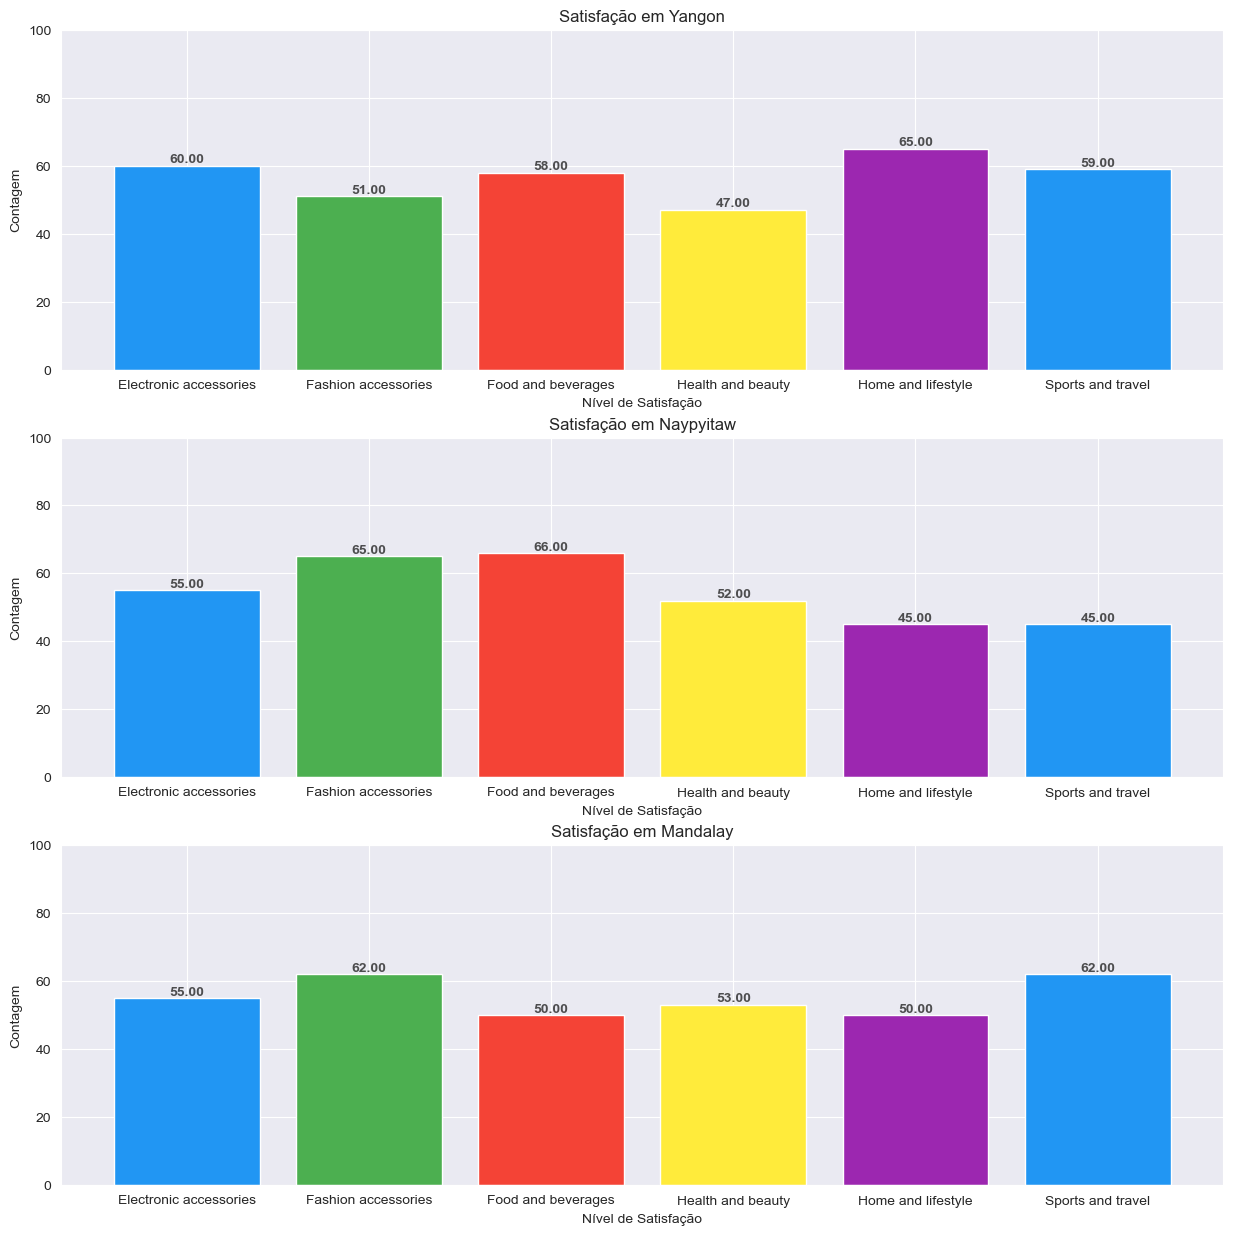

In [318]:
i = 1
product_colors = ['#2196F3', '#4CAF50', '#F44336', '#FFEB3B', '#9C27B0']
plt.figure(figsize= (15 , 15 ))
for df_cidade in lista_dfs:
    count_dict = dict(df_cidade['Product line'].value_counts(sort=False))
    city_name = lista_nomes[i-1]
    plt.subplot( 3 , 1 , i)
    
    create_barplot(count_dict , f"Satisfação em {city_name}" , 'Nível de Satisfação' , 'Contagem' , product_colors)
    plt.ylim(0 , 100)
    i += 1 